In [211]:
import nltk
import re
import pandas as pd
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from ast import literal_eval
%matplotlib inline

In [212]:
df = pd.read_csv('/home/iii/MEGA/NYC Data/GoodReadsScraper/out.csv')
dfReviews = pd.read_csv('/home/iii/MEGA/NYC Data/GoodReadsScraper/reviewsOut.csv', index_col=0)


In [213]:
dfReviews = dfReviews[dfReviews['book_review'].notna()]
dfReviews[0:50]

,book_review,book_title,URL
0,"{0: ""The universe is a joke.\n\nEven before I ...",The Hitchhiker's Guide to the Galaxy,https://www.goodreads.com/book/show/386162.The...
1,{0: 'Apparently a classic of the sci-fi cannon...,Stranger in a Strange Land,https://www.goodreads.com/book/show/350.Strang...
2,{0: 'Badly Written and Ill Conceived Science F...,The Three-Body Problem,https://www.goodreads.com/book/show/20518872-t...
3,{0: 'There\'s a characteristically witty essay...,Dune,https://www.goodreads.com/book/show/44767458-d...
4,{0: 'My first impulse is to dismiss it as an a...,Starship Troopers,https://www.goodreads.com/book/show/17214.Star...
5,"{0: 'There are two kinds of books, those that ...",If I Stay,https://www.goodreads.com/book/show/4374400-if...
6,{0: 'I need to parse my rating of this book in...,Brave New World,https://www.goodreads.com/book/show/5129.Brave...
7,{0: 'Wow.\n\nThis is a wild ride. If you like ...,Neuromancer,https://www.goodreads.com/book/show/6088007-ne...
8,"{0: 'I could say that I love Dick, but that wo...",Do Androids Dream of Electric Sheep?,https://www.goodreads.com/book/show/36402034-d...
9,"{0: ""TANSTAAFL = There ain't no such thing as ...",The Moon Is a Harsh Mistress,https://www.goodreads.com/book/show/16690.The_...


In [214]:
df[0:50]

,id,book_title,book_author,book_narrator,book_genre,book_year,book_length,book_publisher,image_link,amazon_link,amazon_price,goodreads,rating
0,Hitchhiker's Guide to the Galaxy,The Ultimate Hitchhiker's Guide to the Galaxy,Douglas Adams,NaN,Science Fiction,2002.0,815 pages,Del Rey Books,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,13.99,https://www.goodreads.com/book/show/13.The_Ult...,4.36
1,Stranger in a Strange Land,Stranger in a Strange Land,Robert A. Heinlein,NaN,Science Fiction,1991.0,525 pages,Ace,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,9.99,https://www.goodreads.com/book/show/350.Strang...,3.92
2,The Three-Body Problem,The Three-Body Problem,Liu Cixin\nKen Liu,NaN,Science Fiction,2014.0,399 pages,Tor Books,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,11.99,https://www.goodreads.com/book/show/20518872-t...,4.06
3,Dune,Dune,Frank Herbert,NaN,Science Fiction,2019.0,661 pages,Ace Books,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,9.49,https://www.goodreads.com/book/show/44767458-d...,4.23
4,Starship Troopers,Starship Troopers,Robert A. Heinlein,NaN,Science Fiction,1987.0,335 pages,Ace Book,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,9.99,https://www.goodreads.com/book/show/17214.Star...,4.00
5,I,If I Stay,Gayle Forman,NaN,Young Adult,2009.0,201 pages,Dutton Books for Young Readers,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,7.99,https://www.goodreads.com/book/show/4374400-if...,3.94
6,Brave New World,Brave New World,Aldous Huxley,NaN,Classics,1998.0,288 pages,HarperPerennial / Perennial Classics,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,13.99,https://www.goodreads.com/book/show/5129.Brave...,3.99
7,Neuromancer,Neuromancer,William Gibson,NaN,Science Fiction,2000.0,292 pages,Ace,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,8.99,https://www.goodreads.com/book/show/6088007-ne...,3.90
8,Do Androids Dream of Electric Sheep,Do Androids Dream of Electric Sheep?,Philip K. Dick,NaN,Science Fiction,2008.0,258 pages,Ballantine Books,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,11.99,https://www.goodreads.com/book/show/36402034-d...,4.08
9,The Moon Is a Harsh Mistress,The Moon Is a Harsh Mistress,Robert A. Heinlein,NaN,Science Fiction,2005.0,288 pages,Hodder & Stoughton,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,9.99,https://www.goodreads.com/book/show/16690.The_...,4.15


In [215]:
df=df.drop('book_review', axis=1)

KeyError: "['book_review'] not found in axis"

In [216]:
df = df.set_index('book_title').join(dfReviews.set_index('book_title'), how='inner')

# df.drop(['URL'], axis=1)

In [217]:
df.head()

,id,book_author,book_narrator,book_genre,book_year,book_length,book_publisher,image_link,amazon_link,amazon_price,goodreads,rating,book_review,URL
book_title,,,,,,,,,,,,,,
Stranger in a Strange Land,Stranger in a Strange Land,Robert A. Heinlein,NaN,Science Fiction,1991.0,525 pages,Ace,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,9.99,https://www.goodreads.com/book/show/350.Strang...,3.92,{0: 'Apparently a classic of the sci-fi cannon...,https://www.goodreads.com/book/show/350.Strang...
The Three-Body Problem,The Three-Body Problem,Liu Cixin\nKen Liu,NaN,Science Fiction,2014.0,399 pages,Tor Books,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,11.99,https://www.goodreads.com/book/show/20518872-t...,4.06,{0: 'Badly Written and Ill Conceived Science F...,https://www.goodreads.com/book/show/20518872-t...
Dune,Dune,Frank Herbert,NaN,Science Fiction,2019.0,661 pages,Ace Books,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,9.49,https://www.goodreads.com/book/show/44767458-d...,4.23,{0: 'There\'s a characteristically witty essay...,https://www.goodreads.com/book/show/44767458-d...
Starship Troopers,Starship Troopers,Robert A. Heinlein,NaN,Science Fiction,1987.0,335 pages,Ace Book,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,9.99,https://www.goodreads.com/book/show/17214.Star...,4.00,{0: 'My first impulse is to dismiss it as an a...,https://www.goodreads.com/book/show/17214.Star...
If I Stay,I,Gayle Forman,NaN,Young Adult,2009.0,201 pages,Dutton Books for Young Readers,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,7.99,https://www.goodreads.com/book/show/4374400-if...,3.94,"{0: 'There are two kinds of books, those that ...",https://www.goodreads.com/book/show/4374400-if...


In [218]:

df = df.loc[~df['book_review'].isnull(), :]

df.book_review.isnull()

# list(literal_eval(df['book_review'][2]).values())  

book_title
Stranger in a Strange Land                                 False
The Three-Body Problem                                     False
Dune                                                       False
Starship Troopers                                          False
If I Stay                                                  False
                                                           ...  
The Uplift War                                             False
The Invisible Man                                          False
The End of Eternity                                        False
Old Man's War                                              False
Blue Screen: How Peter Gustafson Defragmented the World    False
Name: book_review, Length: 89, dtype: bool

In [219]:
df = df.drop('URL', axis = 1)
df

,id,book_author,book_narrator,book_genre,book_year,book_length,book_publisher,image_link,amazon_link,amazon_price,goodreads,rating,book_review
book_title,,,,,,,,,,,,,
Stranger in a Strange Land,Stranger in a Strange Land,Robert A. Heinlein,NaN,Science Fiction,1991.0,525 pages,Ace,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,9.99,https://www.goodreads.com/book/show/350.Strang...,3.92,{0: 'Apparently a classic of the sci-fi cannon...
The Three-Body Problem,The Three-Body Problem,Liu Cixin\nKen Liu,NaN,Science Fiction,2014.0,399 pages,Tor Books,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,11.99,https://www.goodreads.com/book/show/20518872-t...,4.06,{0: 'Badly Written and Ill Conceived Science F...
Dune,Dune,Frank Herbert,NaN,Science Fiction,2019.0,661 pages,Ace Books,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,9.49,https://www.goodreads.com/book/show/44767458-d...,4.23,{0: 'There\'s a characteristically witty essay...
Starship Troopers,Starship Troopers,Robert A. Heinlein,NaN,Science Fiction,1987.0,335 pages,Ace Book,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,9.99,https://www.goodreads.com/book/show/17214.Star...,4.00,{0: 'My first impulse is to dismiss it as an a...
If I Stay,I,Gayle Forman,NaN,Young Adult,2009.0,201 pages,Dutton Books for Young Readers,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,7.99,https://www.goodreads.com/book/show/4374400-if...,3.94,"{0: 'There are two kinds of books, those that ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Uplift War,The Uplift War,David Brin,NaN,Science Fiction,1995.0,638 pages,Spectra Books,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,16.83,https://www.goodreads.com/book/show/234489.The...,4.07,"{0: ""And here we, no wrong sorry, here come th..."
The Invisible Man,The Invisible Man,H.G. Wells,NaN,Classics,2002.0,192 pages,Signet Classics,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,3.68,https://www.goodreads.com/book/show/17184.The_...,3.64,"{0: ""This is the story of how one angry, naked..."
The End of Eternity,The End of Eternity,Isaac Asimov,NaN,Science Fiction,1971.0,192 pages,Fawcett Crest,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,10.89,https://www.goodreads.com/book/show/509784.The...,4.24,"{0: ""I've always felt that Isaac Asimov writes..."


In [220]:
# literal eval = turns a string back into the object that it is...
# literal_eval(x) changes it back to dictionary
# values() a dictionary method to get all values WITHOUT the keys, then tunring that into a list
# column of lists and returns new dataframe of whatever is in that list/object....


df.book_review = df.book_review[0:48,].apply(lambda x: list(literal_eval(x).values()))

# ValueError: malformed node or string: nan

In [221]:
df.book_review

book_title
Stranger in a Strange Land                                 [Apparently a classic of the sci-fi cannon, I'...
The Three-Body Problem                                     [Badly Written and Ill Conceived Science Ficti...
Dune                                                       [There's a characteristically witty essay by B...
Starship Troopers                                          [My first impulse is to dismiss it as an appal...
If I Stay                                                  [There are two kinds of books, those that you ...
                                                                                 ...                        
The Uplift War                                                                                           NaN
The Invisible Man                                                                                        NaN
The End of Eternity                                                                                      NaN
Old Man'

In [222]:
# column of lists and returns new dataframe of whatever is in that list/object....

explodedDf = df.explode("book_review")

In [223]:
explodedDf

,id,book_author,book_narrator,book_genre,book_year,book_length,book_publisher,image_link,amazon_link,amazon_price,goodreads,rating,book_review
book_title,,,,,,,,,,,,,
Stranger in a Strange Land,Stranger in a Strange Land,Robert A. Heinlein,NaN,Science Fiction,1991.0,525 pages,Ace,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,9.99,https://www.goodreads.com/book/show/350.Strang...,3.92,"Apparently a classic of the sci-fi cannon, I'd..."
Stranger in a Strange Land,Stranger in a Strange Land,Robert A. Heinlein,NaN,Science Fiction,1991.0,525 pages,Ace,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,9.99,https://www.goodreads.com/book/show/350.Strang...,3.92,One must read Heinlein's signature work to und...
Stranger in a Strange Land,Stranger in a Strange Land,Robert A. Heinlein,NaN,Science Fiction,1991.0,525 pages,Ace,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,9.99,https://www.goodreads.com/book/show/350.Strang...,3.92,This is a book that it seems like I should lik...
Stranger in a Strange Land,Stranger in a Strange Land,Robert A. Heinlein,NaN,Science Fiction,1991.0,525 pages,Ace,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,9.99,https://www.goodreads.com/book/show/350.Strang...,3.92,"Well, I don't quite know what the hell that wa..."
Stranger in a Strange Land,Stranger in a Strange Land,Robert A. Heinlein,NaN,Science Fiction,1991.0,525 pages,Ace,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,9.99,https://www.goodreads.com/book/show/350.Strang...,3.92,"(Note: Original pub date is 1961)\n\nFuck you,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Uplift War,The Uplift War,David Brin,NaN,Science Fiction,1995.0,638 pages,Spectra Books,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,16.83,https://www.goodreads.com/book/show/234489.The...,4.07,NaN
The Invisible Man,The Invisible Man,H.G. Wells,NaN,Classics,2002.0,192 pages,Signet Classics,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,3.68,https://www.goodreads.com/book/show/17184.The_...,3.64,NaN
The End of Eternity,The End of Eternity,Isaac Asimov,NaN,Science Fiction,1971.0,192 pages,Fawcett Crest,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,10.89,https://www.goodreads.com/book/show/509784.The...,4.24,NaN


In [224]:
print(df.shape)
print(explodedDf.shape)

explodedDf= explodedDf.dropna(subset= ['book_length'])

(89, 13)
(1446, 13)


In [225]:
print(explodedDf.shape)

(1421, 13)


In [226]:
# make lowercase
explodedDf['book_review'] = explodedDf['book_review'].str.lower()

# remove extra spaces
explodedDf['book_review'] = explodedDf['book_review'].apply(lambda x: re.sub('\s+', ' ', str(x)))

# remove "pages"
explodedDf.book_length = explodedDf['book_length'].apply(lambda x: x.rstrip('pages'))


/home/iii/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/iii/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/iii/.local/lib/python3.7/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [227]:
explodedDf.head()

,id,book_author,book_narrator,book_genre,book_year,book_length,book_publisher,image_link,amazon_link,amazon_price,goodreads,rating,book_review
book_title,,,,,,,,,,,,,
Stranger in a Strange Land,Stranger in a Strange Land,Robert A. Heinlein,NaN,Science Fiction,1991.0,525,Ace,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,9.99,https://www.goodreads.com/book/show/350.Strang...,3.92,"apparently a classic of the sci-fi cannon, i'd..."
Stranger in a Strange Land,Stranger in a Strange Land,Robert A. Heinlein,NaN,Science Fiction,1991.0,525,Ace,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,9.99,https://www.goodreads.com/book/show/350.Strang...,3.92,one must read heinlein's signature work to und...
Stranger in a Strange Land,Stranger in a Strange Land,Robert A. Heinlein,NaN,Science Fiction,1991.0,525,Ace,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,9.99,https://www.goodreads.com/book/show/350.Strang...,3.92,this is a book that it seems like i should lik...
Stranger in a Strange Land,Stranger in a Strange Land,Robert A. Heinlein,NaN,Science Fiction,1991.0,525,Ace,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,9.99,https://www.goodreads.com/book/show/350.Strang...,3.92,"well, i don't quite know what the hell that wa..."
Stranger in a Strange Land,Stranger in a Strange Land,Robert A. Heinlein,NaN,Science Fiction,1991.0,525,Ace,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,9.99,https://www.goodreads.com/book/show/350.Strang...,3.92,"(note: original pub date is 1961) fuck you, he..."


In [228]:
# print(type(explodedDf['book_review'][0]))


explodedDf = explodedDf.loc[~explodedDf['book_year'].isnull(), :]
explodedDf.book_year=explodedDf.book_year.astype(int)
explodedDf.head()



,id,book_author,book_narrator,book_genre,book_year,book_length,book_publisher,image_link,amazon_link,amazon_price,goodreads,rating,book_review
book_title,,,,,,,,,,,,,
Stranger in a Strange Land,Stranger in a Strange Land,Robert A. Heinlein,NaN,Science Fiction,1991,525,Ace,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,9.99,https://www.goodreads.com/book/show/350.Strang...,3.92,"apparently a classic of the sci-fi cannon, i'd..."
Stranger in a Strange Land,Stranger in a Strange Land,Robert A. Heinlein,NaN,Science Fiction,1991,525,Ace,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,9.99,https://www.goodreads.com/book/show/350.Strang...,3.92,one must read heinlein's signature work to und...
Stranger in a Strange Land,Stranger in a Strange Land,Robert A. Heinlein,NaN,Science Fiction,1991,525,Ace,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,9.99,https://www.goodreads.com/book/show/350.Strang...,3.92,this is a book that it seems like i should lik...
Stranger in a Strange Land,Stranger in a Strange Land,Robert A. Heinlein,NaN,Science Fiction,1991,525,Ace,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,9.99,https://www.goodreads.com/book/show/350.Strang...,3.92,"well, i don't quite know what the hell that wa..."
Stranger in a Strange Land,Stranger in a Strange Land,Robert A. Heinlein,NaN,Science Fiction,1991,525,Ace,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com/buy_buttons/12/follo...,9.99,https://www.goodreads.com/book/show/350.Strang...,3.92,"(note: original pub date is 1961) fuck you, he..."


In [229]:
# corpus = text used for study
stop = stopwords.words('english')

# Remove stop words
explodedDf['book_review'] = explodedDf['book_review'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))

In [230]:
# Text Blob...
explodedDf['book_review'] = explodedDf['book_review'].apply(lambda x: TextBlob(x).words)

In [231]:
explodedDf.head()
explodedDf.columns

Index(['id', 'book_author', 'book_narrator', 'book_genre', 'book_year',
       'book_length', 'book_publisher', 'image_link', 'amazon_link',
       'amazon_price', 'goodreads', 'rating', 'book_review'],
      dtype='object')

In [232]:
reviewDict = explodedDf["book_review"]
reviewDict

book_title
Stranger in a Strange Land                                 [apparently, classic, sci-fi, cannon, i, 'd, n...
Stranger in a Strange Land                                 [one, must, read, heinlein, 's, signature, wor...
Stranger in a Strange Land                                 [book, seems, like, like, deals, issues, relig...
Stranger in a Strange Land                                 [well, quite, know, hell, was, i, 'd, gotten, ...
Stranger in a Strange Land                                 [note, original, pub, date, 1961, fuck, you, h...
                                                                                 ...                        
The Uplift War                                                                                         [nan]
The Invisible Man                                                                                      [nan]
The End of Eternity                                                                                    [nan]
Old Man'

In [233]:
lemzter = WordNetLemmatizer()

In [234]:
# sortedWords = ' '.join(sorted(reviewDict[0]))
sortedWordsLem = lemzter.lemmatize(reviewDict)
print(sortedWordsLem)

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [235]:
type(reviewDict[0])

textblob.blob.WordList

In [236]:
reviewDict[0]

WordList(['apparently', 'classic', 'sci-fi', 'cannon', 'i', "'d", 'never', 'heard', 'book', 'came', 'book', 'club', 'here', 'took', 'long', 'time', 'read', 'lack', 'time', 'rather', 'annoying', 'trait', 'author', 'i', "'ll", 'go', 'later', 'one', 'books', 'tells', 'us', 'period', 'written', 'anything', 'else', 'important', 'note', 'first', 'published', '1961', 'later', '1968', 'moon', 'fever', 'running', 'high', 'people', 'seemed', 'high', 'expectations', 'human', 'achievement', 'events', 'set', 'undisclosed', 'future', 'older', 'characters', 'seem', 'remember', 'first', 'moon', 'landing', 'surprised', 'heinlein', 'thinking', 'set', 'around', 'now', 'mix', 'daggy', 'technology', 'like', 'stereo', 'tanks', 'tvs', 'large', 'clumsy', 'listening', 'devices', 'alongside', 'hover', 'crafts', 'spaceships', 'mars', 'scope', 'setting', 'hampered', '50s', 'imagination', 'stranger', 'strange', 'land', 'michael', 'mike', 'smith', 'man', 'mars', 'offspring', 'two', 'scientists', 'board', 'original'

In [266]:
# Word Cloud

wc = WordCloud(background_color='white', max_words=2000, width=800, height=400)

wc.generate(' '.join(reviewDict[2]))

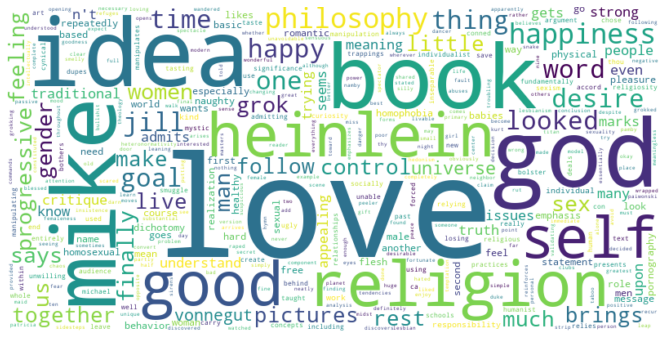

In [267]:
plt.figure(figsize = (12,6))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()



#### MOVE AFTER EXPLODE!!!

In [239]:
# final = pd.DataFrame({'title':[], 'reviews':[]})

In [240]:
# # Explode book_review!

# for i in range(len(df['book_review'])) :
#     temp_title = df['book_title'][i]
#     for ii in range(len(df['book_review'][i])) :
#         temp_review = df['book_review'][i][ii+1]
        
#         final = pd.concat([final, pd.DataFrame({'title':[temp_title], 'reviews':[temp_review]})], axis = 0)

In [241]:
sampleSize = 100

def sent_func(x):
    sentiment = TextBlob(str(x))
    return sentiment.polarity, sentiment.subjectivity

In [242]:
outputAnalysis = explodedDf['book_review'].apply(lambda x: sent_func(x))

sentAnalysis = pd.DataFrame(list(outputAnalysis), columns =['Polarity', 'Subjectivity'])



In [243]:
sentAnalysis[0:100]

,Polarity,Subjectivity
0,0.120596,0.467228
1,0.206159,0.642029
2,0.230067,0.554108
3,-0.059675,0.567518
4,0.169643,0.551587
...,...,...
95,-0.057692,0.296795
96,0.027936,0.501453
97,0.037121,0.632359
98,0.046151,0.433003


In [244]:
explodedDf.index.equals(sentAnalysis.index)
explodedDf.index = sentAnalysis.index

In [245]:
explodedDf['polarity'] = sentAnalysis['Polarity']
explodedDf['subjectivity'] = sentAnalysis['Subjectivity']

In [246]:
explodedDf.columns

Index(['id', 'book_author', 'book_narrator', 'book_genre', 'book_year',
       'book_length', 'book_publisher', 'image_link', 'amazon_link',
       'amazon_price', 'goodreads', 'rating', 'book_review', 'polarity',
       'subjectivity'],
      dtype='object')

In [247]:
explodedDf['book_length'] = explodedDf['book_length'].astype(int)

<AxesSubplot:xlabel='subjectivity', ylabel='amazon_price'>

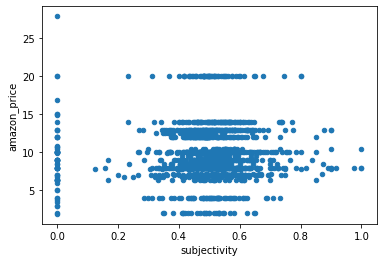

In [263]:
explodedDf.plot.scatter('subjectivity', 'amazon_price')

<AxesSubplot:xlabel='subjectivity', ylabel='rating'>

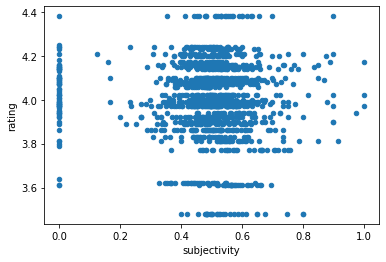

In [261]:
explodedDf.plot.scatter('subjectivity', 'rating')

<AxesSubplot:xlabel='subjectivity', ylabel='book_length'>

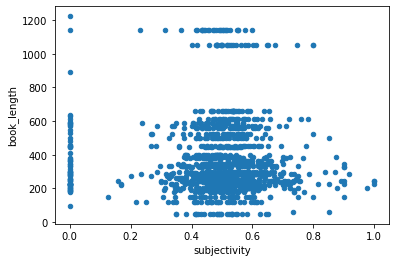

In [262]:
explodedDf.plot.scatter('subjectivity', 'book_length')

<AxesSubplot:xlabel='polarity', ylabel='book_length'>

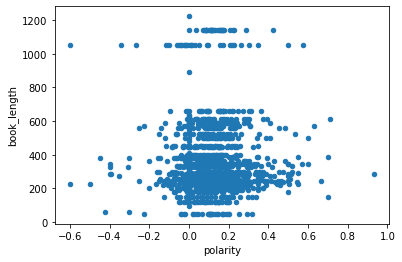

In [260]:
explodedDf.plot.scatter('polarity', 'book_length')

<AxesSubplot:xlabel='subjectivity', ylabel='book_length'>

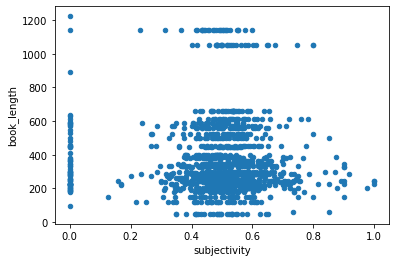

In [259]:
explodedDf.plot.scatter('subjectivity', 'book_length')

<AxesSubplot:xlabel='rating', ylabel='book_year'>

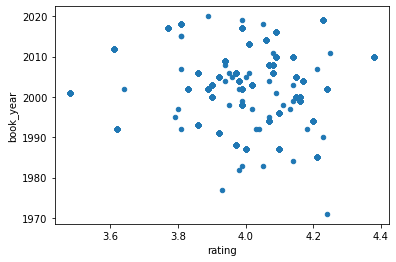

In [268]:
explodedDf.plot.scatter('rating', 'book_year')

<AxesSubplot:xlabel='book_length', ylabel='amazon_price'>

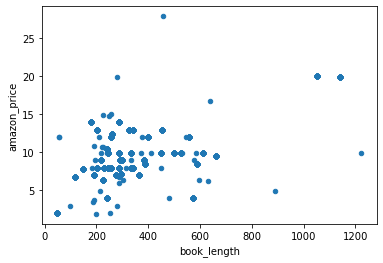

In [270]:
explodedDf.plot.scatter('book_length', 'amazon_price')

<AxesSubplot:xlabel='rating', ylabel='book_length'>

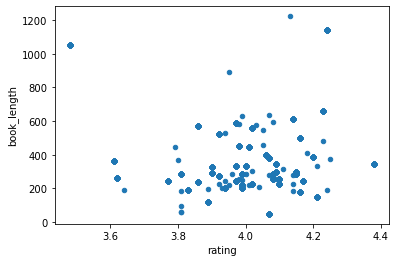

In [248]:
explodedDf.plot.scatter('rating', 'book_length')

<AxesSubplot:xlabel='rating', ylabel='amazon_price'>

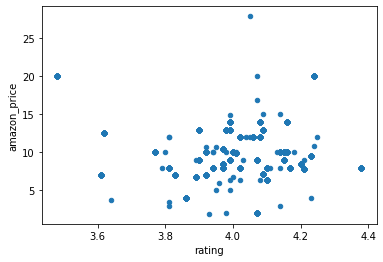

In [269]:
explodedDf.plot.scatter('rating', 'amazon_price')

<AxesSubplot:xlabel='polarity', ylabel='amazon_price'>

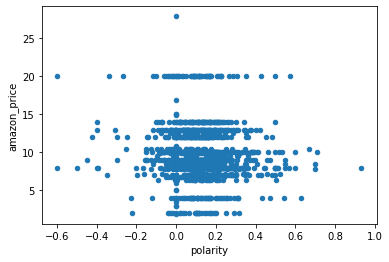

In [271]:
explodedDf.plot.scatter('polarity', 'amazon_price')

<AxesSubplot:xlabel='book_length', ylabel='rating'>

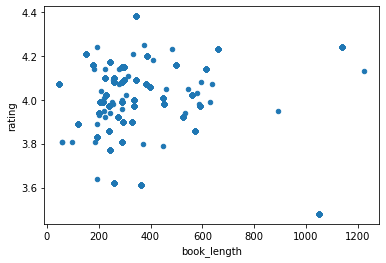

In [251]:
explodedDf.plot.scatter('book_length', 'rating')

In [ ]:
explodedDf.plot.scatter('book_length', 'rating')

In [252]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd

In [254]:
bigModel = smf.ols(formula='rating ~ book_length + amazon_price + book_year + subjectivity', data=explodedDf)

# Publishers are too granular!!!! Too many publishers!
results = bigModel.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.652
Date:                Wed, 09 Dec 2020   Prob (F-statistic):              0.159
Time:                        22:33:26   Log-Likelihood:                 490.26
No. Observations:                1391   AIC:                            -970.5
Df Residuals:                    1386   BIC:                            -944.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.8247      1.061      4.546   

In [255]:
bigModel = smf.ols(formula='subjectivity ~ book_length + amazon_price + book_year', data=explodedDf)
results = bigModel.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           subjectivity   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     12.19
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           7.08e-08
Time:                        22:33:28   Log-Likelihood:                 682.11
No. Observations:                1391   AIC:                            -1356.
Df Residuals:                    1387   BIC:                            -1335.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -4.6501      0.916     -5.078   

In [256]:
bigModel = smf.ols(formula='amazon_price ~ book_length + book_year + rating', data=explodedDf)
results = bigModel.fit()
print(results.summary())

# feature importance...
# shaply value technique. 
# compare a model with and without a given feature. 
# look at adj. r squared to evaluate overal model fit!!!!

                            OLS Regression Results                            
Dep. Variable:           amazon_price   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     203.7
Date:                Wed, 09 Dec 2020   Prob (F-statistic):          1.93e-109
Time:                        22:33:29   Log-Likelihood:                -3467.4
No. Observations:                1391   AIC:                             6943.
Df Residuals:                    1387   BIC:                             6964.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -18.7455     18.225     -1.029      